In [ ]:
pwd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time, datetime
import pandas as pd
import seaborn as sns

## Data Download

In [3]:
# Read New Data
!aws s3 ls s3://drivingdata/data_raw/

2021-08-03 02:20:59          0 
2021-08-03 02:21:22     294321 Train.csv
2021-08-03 02:21:22    9875147 Train_Vehicletravellingdata.csv
2021-08-03 02:21:22    9414848 Train_WeatherData.csv
2021-08-10 05:21:05   30404669 data_final_hyj.csv
2021-08-06 07:52:02   17854225 df.csv


In [4]:
# Copy data
!aws s3 cp s3://drivingdata/data_raw/ raw_data/ --recursive

download: s3://drivingdata/data_raw/Train.csv to raw_data/Train.csv
download: s3://drivingdata/data_raw/Train_WeatherData.csv to raw_data/Train_WeatherData.csv
download: s3://drivingdata/data_raw/Train_Vehicletravellingdata.csv to raw_data/Train_Vehicletravellingdata.csv
download: s3://drivingdata/data_raw/data_final_hyj.csv to raw_data/data_final_hyj.csv
download: s3://drivingdata/data_raw/df.csv to raw_data/df.csv    


In [5]:
df = pd.read_csv("raw_data/Train.csv")
df
# 12994개
# ID, vehicle length(cm), vehicle weight(kg), number of axles, driving style(1-aggressive,2-normal,3-vague)

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2
...,...,...,...,...,...
12989,DR_61322,730,3245,2,2
12990,DR_35712,573,2135,2,3
12991,DR_61590,1747,31864,6,1
12992,DR_69505,710,3244,2,2


In [6]:
df_weather = pd.read_csv("raw_data/Train_WeatherData.csv")
df_weather
# 162566개
# ID, date, 

,ID,V1,V12,V13,V14,V15,V16,V17,V19
0,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight
1,DR_24526,2012-03-21 09:15:07,7.0,clear,None,95.0,124.0,0.0,daylight
2,DR_24526,2012-03-21 09:15:12,7.0,clear,None,95.0,124.0,0.0,daylight
3,DR_24526,2012-03-21 09:15:48,7.0,clear,None,95.0,124.0,0.0,daylight
4,DR_24526,2012-03-21 09:15:54,7.0,clear,None,95.0,124.0,0.0,daylight
...,...,...,...,...,...,...,...,...,...
162561,DR_69505,2013-04-30 16:54:41,5.0,rain,Low,89.0,349.0,3.0,night
162562,DR_69505,2013-04-30 16:55:20,9.0,rain,Low,91.0,45.0,8.0,night
162563,DR_69505,2013-04-30 16:55:21,9.0,rain,Low,91.0,45.0,8.0,night
162564,DR_56117,2013-04-30 16:55:23,9.0,snow,Moderate,91.0,45.0,8.0,night


In [7]:
df_vehicle = pd.read_csv("raw_data/Train_Vehicletravellingdata.csv")
df_vehicle
# 162566개

,ID,V1,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,1,88,57230,88,22892,1698,4.0,Dry
3,DR_24526,2012-03-21 09:15:48,2,84,57228,89,1945,544,127.0,Dry
4,DR_24526,2012-03-21 09:15:54,1,89,57231,88,13787,1893,42.0,Dry
...,...,...,...,...,...,...,...,...,...,...
162561,DR_69505,2013-04-30 16:54:41,1,88,794432,87,14577,1063,3.0,Dry
162562,DR_69505,2013-04-30 16:55:20,2,68,794429,83,10728,1896,124.0,Dry
162563,DR_69505,2013-04-30 16:55:21,1,73,794433,88,2046,572,39.0,Dry
162564,DR_56117,2013-04-30 16:55:23,2,69,794434,68,3244,710,1.0,Dry


## Data Merge

In [8]:
# df_weather, df_vehicle row 개수 동일
# [ID, V1(date)]기준 outer join 수행
df_merge = df_weather.merge(df_vehicle, how="outer", on=['ID', 'V1'])
df_merge
# 162566개

,ID,V1,V12,V13,V14,V15,V16,V17,V19,V3,V4,V7,V8,V9,V10,V11,V18
0,DR_24526,2012-03-21 09:14:55,7.0,clear,None,95.0,146.0,1.0,daylight,1,81,57227,87,16986,941,94.0,Dry
1,DR_24526,2012-03-21 09:15:07,7.0,clear,None,95.0,124.0,0.0,daylight,1,88,57229,81,1708,551,11.0,Dry
2,DR_24526,2012-03-21 09:15:12,7.0,clear,None,95.0,124.0,0.0,daylight,1,88,57230,88,22892,1698,4.0,Dry
3,DR_24526,2012-03-21 09:15:48,7.0,clear,None,95.0,124.0,0.0,daylight,2,84,57228,89,1945,544,127.0,Dry
4,DR_24526,2012-03-21 09:15:54,7.0,clear,None,95.0,124.0,0.0,daylight,1,89,57231,88,13787,1893,42.0,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162561,DR_69505,2013-04-30 16:54:41,5.0,rain,Low,89.0,349.0,3.0,night,1,88,794432,87,14577,1063,3.0,Dry
162562,DR_69505,2013-04-30 16:55:20,9.0,rain,Low,91.0,45.0,8.0,night,2,68,794429,83,10728,1896,124.0,Dry
162563,DR_69505,2013-04-30 16:55:21,9.0,rain,Low,91.0,45.0,8.0,night,1,73,794433,88,2046,572,39.0,Dry
162564,DR_56117,2013-04-30 16:55:23,9.0,snow,Moderate,91.0,45.0,8.0,night,2,69,794434,68,3244,710,1.0,Dry


In [9]:
# [ID]기준 df, df_merge join 수행
data = pd.merge(df, df_merge, on=['ID'])
data = data[['ID','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','DrivingStyle']]
data

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,DrivingStyle
0,DR_24526,2012-03-21 09:14:55,1265,1,81,10243,2,57227,87,16986,...,94.0,7.0,clear,None,95.0,146.0,1.0,Dry,daylight,2
1,DR_24526,2012-03-21 09:15:07,1265,1,88,10243,2,57229,81,1708,...,11.0,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,2
2,DR_24526,2012-03-21 09:15:12,1265,1,88,10243,2,57230,88,22892,...,4.0,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,2
3,DR_24526,2012-03-21 09:15:48,1265,2,84,10243,2,57228,89,1945,...,127.0,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,2
4,DR_24526,2012-03-21 09:15:54,1265,1,89,10243,2,57231,88,13787,...,42.0,7.0,clear,None,95.0,124.0,0.0,Dry,daylight,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162561,DR_69505,2013-04-30 16:54:41,710,1,88,3244,2,794432,87,14577,...,3.0,5.0,rain,Low,89.0,349.0,3.0,Dry,night,2
162562,DR_69505,2013-04-30 16:55:20,710,2,68,3244,2,794429,83,10728,...,124.0,9.0,rain,Low,91.0,45.0,8.0,Dry,night,2
162563,DR_69505,2013-04-30 16:55:21,710,1,73,3244,2,794433,88,2046,...,39.0,9.0,rain,Low,91.0,45.0,8.0,Dry,night,2
162564,DR_56117,2013-04-30 16:55:23,2001,2,69,27812,6,794434,68,3244,...,1.0,9.0,snow,Moderate,91.0,45.0,8.0,Dry,night,1


In [10]:
df = pd.DataFrame()

In [11]:
# ID, V1-V11
df['id'] = data['ID']
df['time'] = pd.to_datetime(data['V1'])
df['veh_len'] = data['V2']
df['road_lane'] = data['V3']
df['veh_spd'] = data['V4']
df['veh_weight'] = data['V5']
df['num_axles'] = data['V6']
df['id_preced'] = data['V7']
df['veh_spd_preced'] = data['V8']
df['veh_weight_preced'] = data['V9']
df['veh_len_preced'] = data['V10']
df['time_gap'] = data['V11']

# V12-19, driving style
df['temperature'] = data['V12']
df['precipitation_type'] = data['V13']
df['precipitation_intensity'] = data['V14']
df['precipitation_humidity'] = data['V15']
df['wind_dir'] = data['V16']
df['wind_spd'] = data['V17']
df['road_con'] = data['V18']
df['light_con'] = data['V19']
df['driving_style'] = data['DrivingStyle']

## Find and Remove Null/NA

In [12]:
data.isnull().sum()

ID                 0
V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11             2455
V12             2057
V13                0
V14                0
V15             2105
V16             2114
V17             2464
V18                0
V19                0
DrivingStyle       0
dtype: int64

<AxesSubplot:>

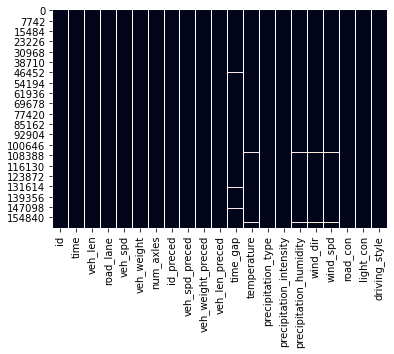

In [13]:
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False)

In [14]:
df=df.fillna(method='pad')

In [15]:
df=df.fillna(method='bfill')

In [16]:
df['wind_spd'].isnull().sum()

0

<AxesSubplot:>

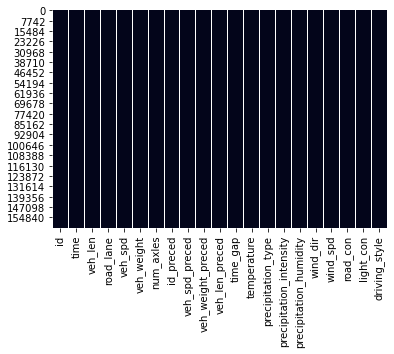

In [17]:
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162566 entries, 0 to 162565
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       162566 non-null  object        
 1   time                     162566 non-null  datetime64[ns]
 2   veh_len                  162566 non-null  int64         
 3   road_lane                162566 non-null  int64         
 4   veh_spd                  162566 non-null  int64         
 5   veh_weight               162566 non-null  int64         
 6   num_axles                162566 non-null  int64         
 7   id_preced                162566 non-null  int64         
 8   veh_spd_preced           162566 non-null  int64         
 9   veh_weight_preced        162566 non-null  int64         
 10  veh_len_preced           162566 non-null  int64         
 11  time_gap                 162566 non-null  float64       
 12  temperature     

## Data Analysis

In [19]:
#categorical feature: 카테고리 종류 확인
#numeric feature: 데이터의 분포 확인

# Frequency tables for each categorical feature
for column in df.select_dtypes(include=['object']).columns:
    print(column, len(df[column].unique()))

# <result> id는 너무 많은 카테고리 존재 -> 사용 x  
# id 12994
# precipitation_type 3
# precipitation_intensity 5
# road_con 4
# light_con 3

id 12994
precipitation_type 3
precipitation_intensity 5
road_con 4
light_con 3


### categorical feature

In [20]:
column = 'precipitation_type'
display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

# 주로 clear 0.930447

col_0,% observations
precipitation_type,
clear,0.930447
rain,0.032990
snow,0.036564


In [21]:
column = 'precipitation_intensity'
display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

# 주로 None 0.932391

col_0,% observations
precipitation_intensity,
,0.013988
High,0.000609
Low,0.050127
Moderate,0.002885
None,0.932391


In [22]:
column = 'road_con'
display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

# 주로 Dry 0.723804

col_0,% observations
road_con,
Dry,0.723804
Snow covered,0.010685
Visible tracks,0.034048
Wet,0.231463


In [23]:
column = 'light_con'
display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

# 주로 night 0.590068

col_0,% observations
light_con,
daylight,0.295431
night,0.590068
twilight,0.114501


In [24]:
# correlation with Y
y_column = 'driving_style'
x_column = 'precipitation_type'
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

# clear -> 1,2,3
# rain -> 1

driving_style,1,2,3
precipitation_type,,,
clear,0.893726,0.930988,0.948654
rain,0.060175,0.026874,0.029392
snow,0.046100,0.042138,0.021954


In [25]:
# correlation with Y
y_column = 'driving_style'
x_column = 'precipitation_intensity'
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

driving_style,1,2,3
precipitation_intensity,,,
,0.013845,0.015044,0.012237
High,0.000844,0.000856,0.000060
Low,0.087789,0.046856,0.036150
Moderate,0.001342,0.004579,0.000760
None,0.896180,0.932665,0.950794


In [26]:
# correlation with Y
y_column = 'driving_style'
x_column = 'road_con'
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

driving_style,1,2,3
road_con,,,
Dry,0.505638,0.735493,0.817331
Snow covered,0.022206,0.012177,0.002099
Visible tracks,0.028151,0.047527,0.013816
Wet,0.444006,0.204804,0.166753


In [27]:
# correlation with Y
y_column = 'driving_style'
x_column = 'light_con'
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

# night -> 1, 3

driving_style,1,2,3
light_con,,,
daylight,0.216883,0.486586,0.005858
night,0.692414,0.431358,0.811133
twilight,0.090703,0.082056,0.183009


### numeric feature

,veh_len,road_lane,veh_spd,veh_weight,num_axles,id_preced,veh_spd_preced,veh_weight_preced,veh_len_preced,time_gap,temperature,precipitation_humidity,wind_dir,wind_spd,driving_style
count,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,162566.00000,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000
mean,865.518349,1.500849,83.455483,6020.270481,2.846315,460124.263979,83.458817,5017.562793,790.775285,105.26038,4.651409,60.629744,182.210038,4.183612,2.147263
std,495.155881,0.500001,9.375122,7972.925231,1.466560,272271.224195,9.373120,7399.315434,481.944297,177.87340,3.219471,18.254615,88.981423,3.024879,0.668102
min,155.000000,1.000000,8.000000,44.000000,2.000000,20.000000,0.000000,3.000000,102.000000,1.00000,-13.000000,16.000000,6.000000,0.000000,1.000000
25%,550.000000,1.000000,78.000000,1625.000000,2.000000,142983.250000,78.000000,1502.000000,527.000000,6.00000,2.000000,46.000000,152.000000,1.000000,2.000000
50%,577.000000,2.000000,83.000000,2013.000000,2.000000,594321.500000,83.000000,1862.000000,560.000000,43.00000,5.000000,58.000000,180.000000,4.000000,2.000000
75%,1060.000000,2.000000,88.000000,6220.000000,3.000000,692362.750000,88.000000,2669.000000,701.000000,125.00000,7.000000,76.000000,208.000000,7.000000,3.000000
max,2337.000000,2.000000,161.000000,57230.000000,9.000000,794435.000000,161.000000,69548.000000,2981.000000,1797.00000,24.000000,97.000000,360.000000,17.000000,3.000000


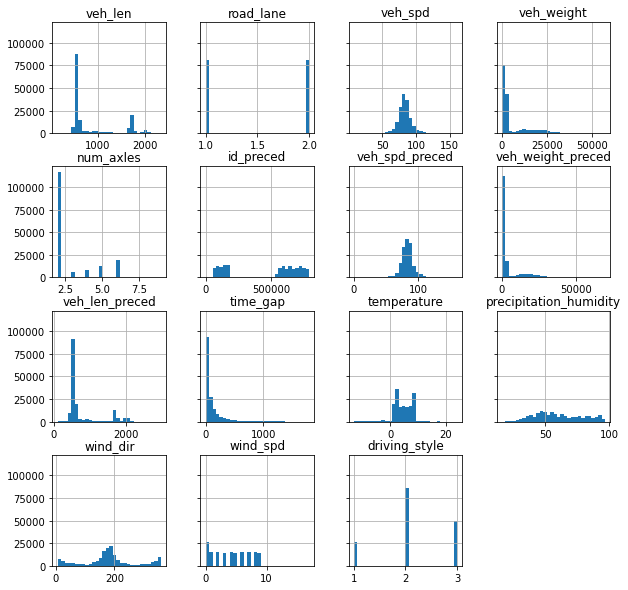

In [28]:
display(df.describe())
%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(10, 10))

# one-hot-encoding 필요 : road_lane, num_axles
# scaler 필요 : veh_len, veh_weight, time_gap

time


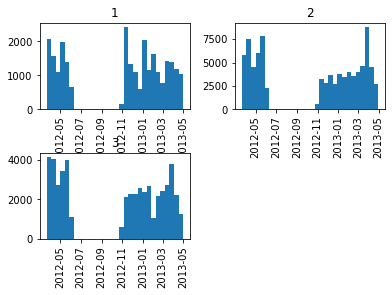

veh_len


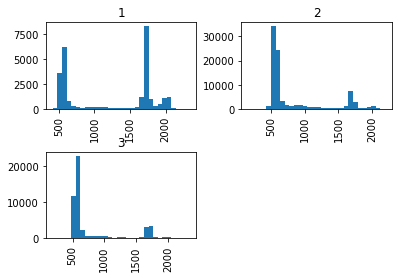

road_lane


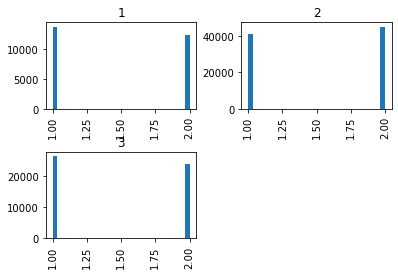

veh_spd


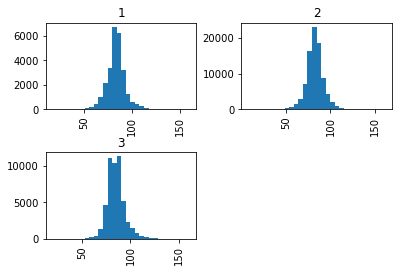

veh_weight


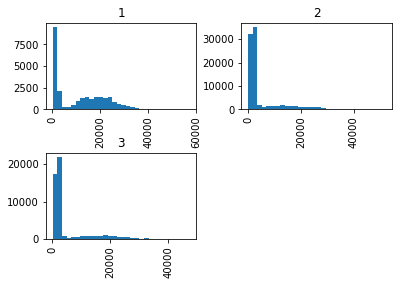

num_axles


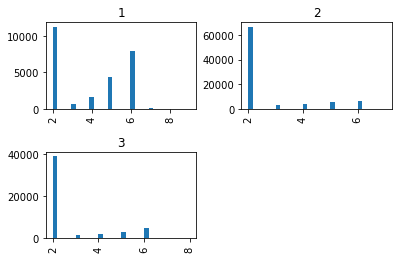

id_preced


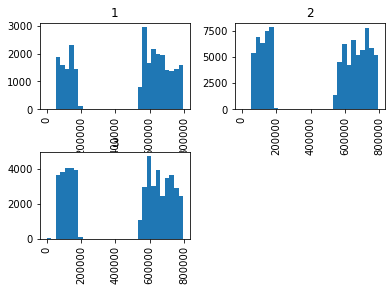

veh_spd_preced


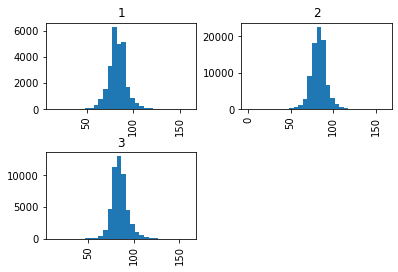

veh_weight_preced


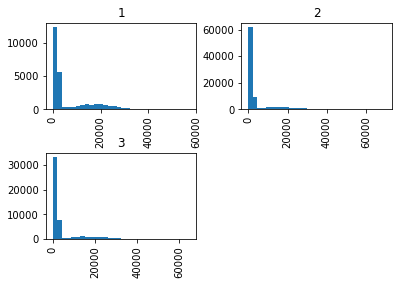

veh_len_preced


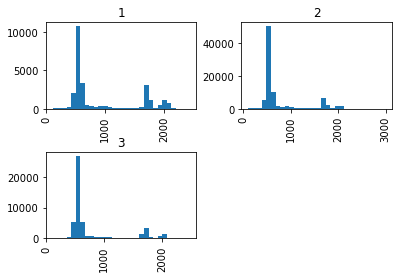

time_gap


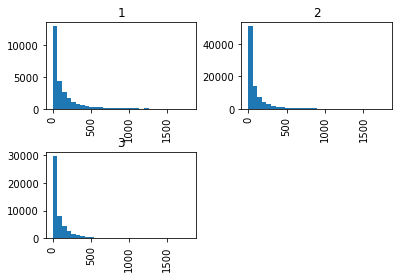

temperature


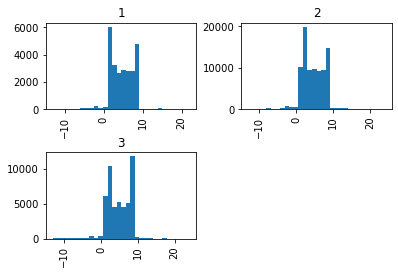

precipitation_humidity


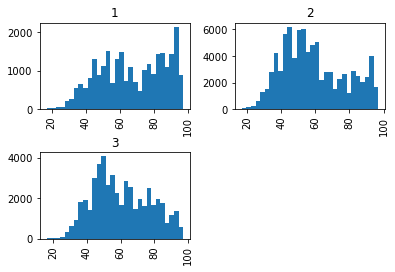

wind_dir


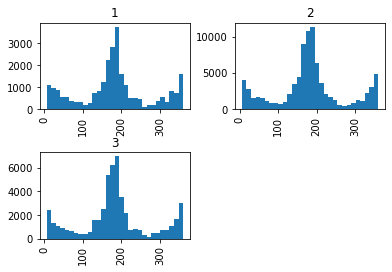

wind_spd


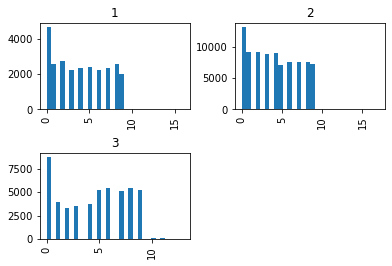

driving_style


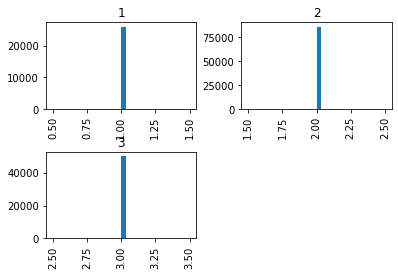

In [29]:
# driving style과의 correlation
for column in df.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = df[column].hist(by=df[y_column], bins=30)
    plt.show()

[Text(0.5, 0, 'veh_len'),
 Text(1.5, 0, 'road_lane'),
 Text(2.5, 0, 'veh_spd'),
 Text(3.5, 0, 'veh_weight'),
 Text(4.5, 0, 'num_axles'),
 Text(5.5, 0, 'id_preced'),
 Text(6.5, 0, 'veh_spd_preced'),
 Text(7.5, 0, 'veh_weight_preced'),
 Text(8.5, 0, 'veh_len_preced'),
 Text(9.5, 0, 'time_gap'),
 Text(10.5, 0, 'temperature'),
 Text(11.5, 0, 'precipitation_humidity'),
 Text(12.5, 0, 'wind_dir'),
 Text(13.5, 0, 'wind_spd'),
 Text(14.5, 0, 'driving_style')]

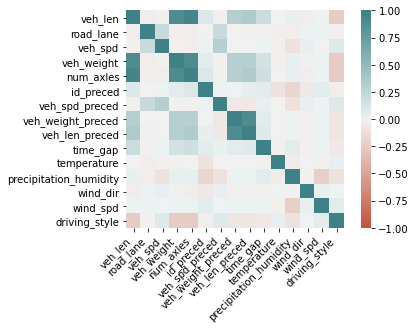

In [30]:
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,200,n=200), square=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

## Feature Engineering

### categorical : one-hot-encoding

In [31]:
one_hot_pt=pd.get_dummies(df['precipitation_type'])
one_hot_pt.head()

,clear,rain,snow
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
one_hot_rc=pd.get_dummies(df['road_con'])
one_hot_rc.head()

,Dry,Snow covered,Visible tracks,Wet
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [33]:
one_hot_lc=pd.get_dummies(df['light_con'])
one_hot_lc.head()

,daylight,night,twilight
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
# 데이터 중간에 space 있음
df['precipitation_intensity'].value_counts()

None        151575
Low           8149
              2274
Moderate       469
High            99
Name: precipitation_intensity, dtype: int64

In [35]:
# replace field that's entirely space (or empty) with NaN
df['precipitation_intensity'] = df['precipitation_intensity'].replace(r'^\s*$', np.nan, regex=True)

In [37]:
df['precipitation_intensity'].isnull().sum()

2274

In [38]:
df_snow = df[df['precipitation_type'].str.contains('snow')]
df_snow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5944 entries, 877 to 162565
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5944 non-null   object        
 1   time                     5944 non-null   datetime64[ns]
 2   veh_len                  5944 non-null   int64         
 3   road_lane                5944 non-null   int64         
 4   veh_spd                  5944 non-null   int64         
 5   veh_weight               5944 non-null   int64         
 6   num_axles                5944 non-null   int64         
 7   id_preced                5944 non-null   int64         
 8   veh_spd_preced           5944 non-null   int64         
 9   veh_weight_preced        5944 non-null   int64         
 10  veh_len_preced           5944 non-null   int64         
 11  time_gap                 5944 non-null   float64       
 12  temperature              5944 

In [39]:
df_snow['precipitation_intensity'].value_counts()

Low         3228
Moderate     336
None         108
High          40
Name: precipitation_intensity, dtype: int64

In [40]:
df_rain = df[df['precipitation_type'].str.contains('rain')]
df_rain['precipitation_intensity'].value_counts()

Low         4921
None         208
Moderate     133
High          59
Name: precipitation_intensity, dtype: int64

In [41]:
df_clear = df[df['precipitation_type'].str.contains('clear')]
df_clear['precipitation_intensity'].value_counts()

None    151259
Name: precipitation_intensity, dtype: int64

In [49]:
df_pi = df
df_pi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162566 entries, 0 to 162565
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       162566 non-null  object        
 1   time                     162566 non-null  datetime64[ns]
 2   veh_len                  162566 non-null  int64         
 3   road_lane                162566 non-null  int64         
 4   veh_spd                  162566 non-null  int64         
 5   veh_weight               162566 non-null  int64         
 6   num_axles                162566 non-null  int64         
 7   id_preced                162566 non-null  int64         
 8   veh_spd_preced           162566 non-null  int64         
 9   veh_weight_preced        162566 non-null  int64         
 10  veh_len_preced           162566 non-null  int64         
 11  time_gap                 162566 non-null  float64       
 12  temperature     

In [50]:
df_pi['precipitation_intensity'].isnull().sum()

0

In [51]:
df_pi['precipitation_intensity'].value_counts()

None        151575
Low          10423
Moderate       469
High            99
Name: precipitation_intensity, dtype: int64

In [52]:
df_pi['precipitation_intensity'] = np.where(df_pi['precipitation_type'].isin(['snow', 'rain']) & df_pi['precipitation_intensity'].isnull(), 'Low', df_pi['precipitation_intensity'])
df_pi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162566 entries, 0 to 162565
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       162566 non-null  object        
 1   time                     162566 non-null  datetime64[ns]
 2   veh_len                  162566 non-null  int64         
 3   road_lane                162566 non-null  int64         
 4   veh_spd                  162566 non-null  int64         
 5   veh_weight               162566 non-null  int64         
 6   num_axles                162566 non-null  int64         
 7   id_preced                162566 non-null  int64         
 8   veh_spd_preced           162566 non-null  int64         
 9   veh_weight_preced        162566 non-null  int64         
 10  veh_len_preced           162566 non-null  int64         
 11  time_gap                 162566 non-null  float64       
 12  temperature     

In [53]:
df_pi['precipitation_intensity'].isnull().sum()

0

<AxesSubplot:>

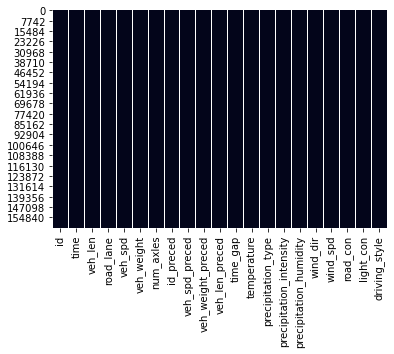

In [54]:
%matplotlib inline
sns.heatmap(df_pi.isnull(), cbar=False)

In [55]:
df_pi['precipitation_intensity'].value_counts()

None        151575
Low          10423
Moderate       469
High            99
Name: precipitation_intensity, dtype: int64

In [56]:
one_hot_pi=pd.get_dummies(df_pi['precipitation_intensity'])
one_hot_pi.head()

,High,Low,Moderate,None
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [57]:
one_hot_rl=pd.get_dummies(df['road_lane'])
one_hot_rl['lane1']=one_hot_rl[1]
one_hot_rl['lane2']=one_hot_rl[2]
one_hot_rl = pd.concat([one_hot_rl['lane1'], one_hot_rl['lane2']], axis = 1)
one_hot_rl.head()

,lane1,lane2
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [58]:
df['num_axles'].value_counts()

2    116972
6     19318
5     12538
4      7836
3      5629
7       255
9        12
8         6
Name: num_axles, dtype: int64

In [59]:
one_hot_ax=pd.get_dummies(df['num_axles'])
one_hot_ax['axles2']=one_hot_ax[2]
one_hot_ax['axles3']=one_hot_ax[3]
one_hot_ax['axles4']=one_hot_ax[4]
one_hot_ax['axles5']=one_hot_ax[5]
one_hot_ax['axles6']=one_hot_ax[6]
one_hot_ax['axles7']=one_hot_ax[7]
one_hot_ax['axles8']=one_hot_ax[8]
one_hot_ax['axles9']=one_hot_ax[9]
one_hot_ax = pd.concat([one_hot_ax['axles2'], one_hot_ax['axles3'], one_hot_ax['axles4'], one_hot_ax['axles5'], one_hot_ax['axles6'], one_hot_ax['axles7'], one_hot_ax['axles8'], one_hot_ax['axles9']], axis = 1)
one_hot_ax.head()

,axles2,axles3,axles4,axles5,axles6,axles7,axles8,axles9
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


### numeric : min-max-scalar

In [60]:
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['veh_len', 'veh_weight', 'veh_weight_preced', 'veh_len_preced', 'time_gap']
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(df[numeric_features])

In [61]:
transformed_data

array([[0.50870761, 0.17834785, 0.2442016 , 0.29142063, 0.05178174],
       [0.50870761, 0.17834785, 0.0245165 , 0.15595693, 0.00556793],
       [0.50870761, 0.17834785, 0.32912503, 0.55435915, 0.00167038],
       ...,
       [0.2543538 , 0.05595775, 0.02937666, 0.16325113, 0.02115813],
       [0.84601283, 0.48557339, 0.04660292, 0.21118444, 0.        ],
       [0.84601283, 0.48557339, 0.01673736, 0.15039944, 0.05902004]])

In [62]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df

,0,1,2,3,4
0,0.508708,0.178348,0.244202,0.291421,0.051782
1,0.508708,0.178348,0.024517,0.155957,0.005568
2,0.508708,0.178348,0.329125,0.554359,0.001670
3,0.508708,0.178348,0.027924,0.153526,0.070156
4,0.508708,0.178348,0.198203,0.622091,0.022829
...,...,...,...,...,...
162561,0.254354,0.055958,0.209562,0.333796,0.001114
162562,0.254354,0.055958,0.154217,0.623133,0.068486
162563,0.254354,0.055958,0.029377,0.163251,0.021158
162564,0.846013,0.485573,0.046603,0.211184,0.000000


In [63]:
transformed_df['veh_len']=transformed_df[0]
transformed_df['veh_weight']=transformed_df[1]
transformed_df['veh_weight_preced']=transformed_df[2]
transformed_df['veh_len_preced']=transformed_df[3]
transformed_df['time_gap']=transformed_df[4]
transformed_df = pd.concat([transformed_df['veh_len'], transformed_df['veh_weight'], transformed_df['veh_weight_preced'], transformed_df['veh_len_preced'], transformed_df['time_gap']], axis = 1)
transformed_df.head()

,veh_len,veh_weight,veh_weight_preced,veh_len_preced,time_gap
0,0.508708,0.178348,0.244202,0.291421,0.051782
1,0.508708,0.178348,0.024517,0.155957,0.005568
2,0.508708,0.178348,0.329125,0.554359,0.001670
3,0.508708,0.178348,0.027924,0.153526,0.070156
4,0.508708,0.178348,0.198203,0.622091,0.022829


In [64]:
final_df = pd.concat([df['driving_style'], one_hot_pt, one_hot_pi, one_hot_rc, one_hot_lc, one_hot_rl, one_hot_ax, transformed_df, df['veh_spd'], df['id_preced'], df['veh_spd_preced'], df['temperature'], df['precipitation_humidity'], df['wind_dir'], df['wind_spd']], axis = 1)
final_df.shape

(162566, 37)

In [65]:
final_df.head()

,driving_style,clear,rain,snow,High,Low,Moderate,None,Dry,Snow covered,...,veh_weight_preced,veh_len_preced,time_gap,veh_spd,id_preced,veh_spd_preced,temperature,precipitation_humidity,wind_dir,wind_spd
0,2,1,0,0,0,0,0,1,1,0,...,0.244202,0.291421,0.051782,81,57227,87,7.0,95.0,146.0,1.0
1,2,1,0,0,0,0,0,1,1,0,...,0.024517,0.155957,0.005568,88,57229,81,7.0,95.0,124.0,0.0
2,2,1,0,0,0,0,0,1,1,0,...,0.329125,0.554359,0.001670,88,57230,88,7.0,95.0,124.0,0.0
3,2,1,0,0,0,0,0,1,1,0,...,0.027924,0.153526,0.070156,84,57228,89,7.0,95.0,124.0,0.0
4,2,1,0,0,0,0,0,1,1,0,...,0.198203,0.622091,0.022829,89,57231,88,7.0,95.0,124.0,0.0


In [66]:
final_df.to_csv("raw_data/data_final_hyj.csv")

In [67]:
final_df.head()

,driving_style,clear,rain,snow,High,Low,Moderate,None,Dry,Snow covered,...,veh_weight_preced,veh_len_preced,time_gap,veh_spd,id_preced,veh_spd_preced,temperature,precipitation_humidity,wind_dir,wind_spd
0,2,1,0,0,0,0,0,1,1,0,...,0.244202,0.291421,0.051782,81,57227,87,7.0,95.0,146.0,1.0
1,2,1,0,0,0,0,0,1,1,0,...,0.024517,0.155957,0.005568,88,57229,81,7.0,95.0,124.0,0.0
2,2,1,0,0,0,0,0,1,1,0,...,0.329125,0.554359,0.001670,88,57230,88,7.0,95.0,124.0,0.0
3,2,1,0,0,0,0,0,1,1,0,...,0.027924,0.153526,0.070156,84,57228,89,7.0,95.0,124.0,0.0
4,2,1,0,0,0,0,0,1,1,0,...,0.198203,0.622091,0.022829,89,57231,88,7.0,95.0,124.0,0.0


In [68]:
final_df.columns

Index(['driving_style', 'clear', 'rain', 'snow', 'High', 'Low', 'Moderate',
       'None', 'Dry', 'Snow covered', 'Visible tracks', 'Wet', 'daylight',
       'night', 'twilight', 'lane1', 'lane2', 'axles2', 'axles3', 'axles4',
       'axles5', 'axles6', 'axles7', 'axles8', 'axles9', 'veh_len',
       'veh_weight', 'veh_weight_preced', 'veh_len_preced', 'time_gap',
       'veh_spd', 'id_preced', 'veh_spd_preced', 'temperature',
       'precipitation_humidity', 'wind_dir', 'wind_spd'],
      dtype='object')

In [ ]:
import boto3
import sagemaker

from sagemaker import get_execution_role

role = get_execution_role()

account_id = role.split(':')[4]
region = boto3.Session().region_name
sess = sagemaker.session.Session()
bucket = sess.default_bucket()

print('Account: {}'.format(account_id))
print('Region: {}'.format(region))
print('Role: {}'.format(role))
print('S3 Bucket: {}'.format(bucket))

In [ ]:
PreprocessCodeS3Uri = "s3://drivingdata/data_raw/data_final_hyj.csv"
!aws s3 cp 'raw_data/data_final_hyj.csv' $PreprocessCodeS3Uri